# Finding Heavy Traffic Indicators on I-94

## Exploratory data analysis of I-94 traffic data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [12]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [14]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


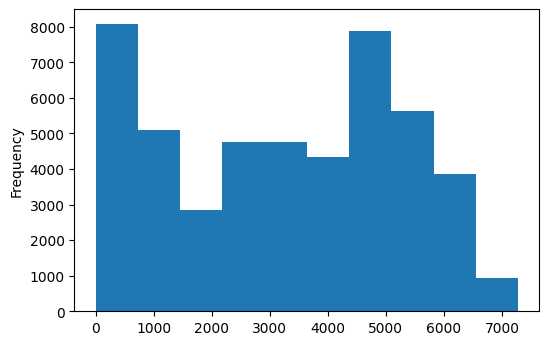

In [21]:
traffic['traffic_volume'].plot.hist()
plt.show()

In [24]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Traffic volume varied from 0 to 7,280 cars, with an average of 3,380 cars

## Traffic Volume: Day vs. Night
Daytime is defined as hours from 7AM to 7PM (12 hours)
Nighttime is defined as hours from 7PM to 7AM (12 hours)

In [53]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['date_time'].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [40]:
daytime_traffic = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(daytime_traffic.shape)
nighttime_traffic = traffic.copy()[(traffic['date_time'].dt.hour >=19) | (traffic['date_time'].dt.hour < 7)]
print(nighttime_traffic.shape)

(23877, 9)
(24327, 9)


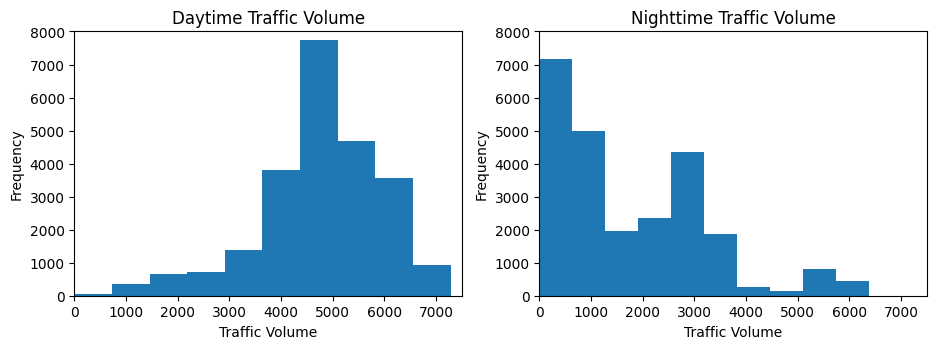

In [44]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(daytime_traffic['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title('Daytime Traffic Volume')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1,2,2)
plt.hist(nighttime_traffic['traffic_volume'])
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title('Nighttime Traffic Volume')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

The first histogram shows that the distribution of daytime traffic volume is left-skewed, which means that most of the traffic volumes are high

On the other hand, the histogram for nighttime traffic data is right-skewed, which means that most of the traffic volumes are low

## Time Indicators

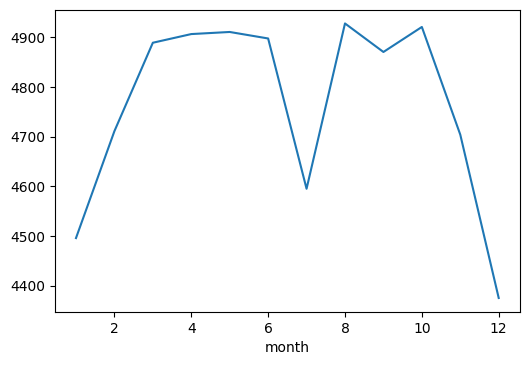

In [47]:
daytime_traffic['month'] = daytime_traffic['date_time'].dt.month
by_month = daytime_traffic.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

Traffic appears less heavy during colder months (Nov-Feb) and heavier through warmer months  March-Oct, although there is a sharp decrease during July.

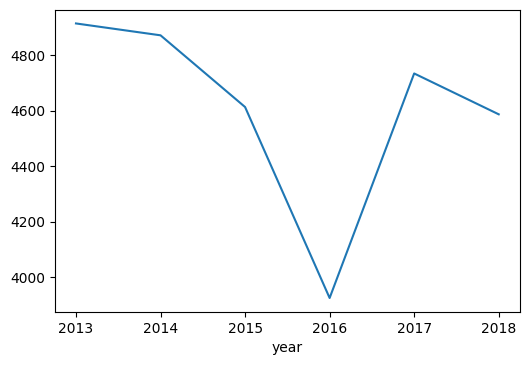

In [50]:
daytime_traffic['year'] = daytime_traffic['date_time'].dt.year
july = daytime_traffic[daytime_traffic['month'] == 7]
july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Traffic during July was extremely low in 2016 but high in other years just like the other warmer months. In general, traffic appears heavier in warmer months compared to colder months.

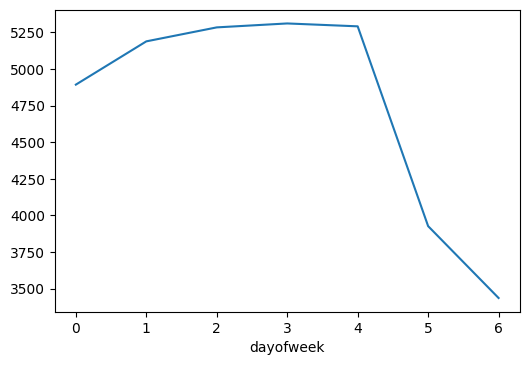

In [52]:
daytime_traffic['dayofweek'] = daytime_traffic['date_time'].dt.dayofweek
by_dayofweek = daytime_traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Traffic is noticeably higher during the weekdays (Mon-Fri), with traffic volume rising over 5000 cars, and it is lighter on weekends, with values dropping below 4000 cars

In [54]:
daytime_traffic['hour'] = daytime_traffic['date_time'].dt.hour
bussiness_days = daytime_traffic.copy()[daytime_traffic['dayofweek'] <= 4]
weekend = daytime_traffic.copy()[daytime_traffic['dayofweek'] >= 5]
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


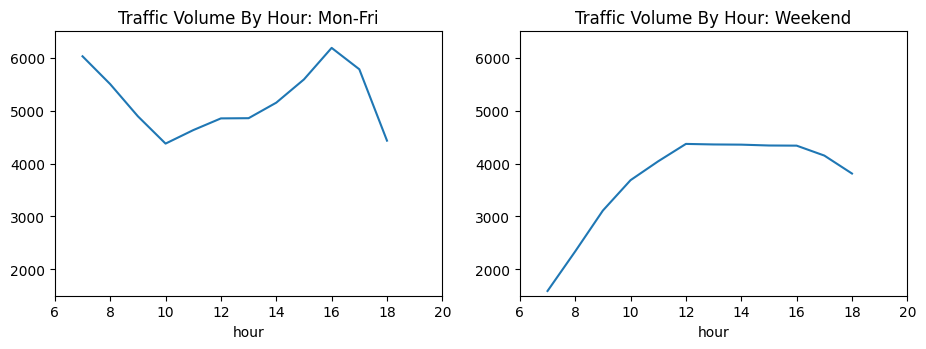

In [56]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Mon-Fri')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

As observed previously, traffic volume is usually higher on weekdays than weekends. The most busy traffic times are around 7 and 16 with over 6000 cars, which is to be expected, as most people are commuting at these times. 

## Weather Indicators

In [59]:
daytime_traffic.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Upon viewing the correlation values between traffic_volume and the numerical weather columns, we observe that temperature shows a correlation of about 0.13

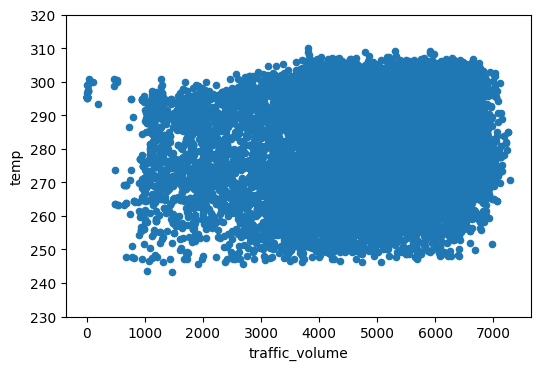

In [62]:
daytime_traffic.plot.scatter('traffic_volume','temp')
plt.ylim(230,320)
plt.show()

The scatterplot indicates that temperature is not a reliable indicator of heavy traffic

## Weather Types

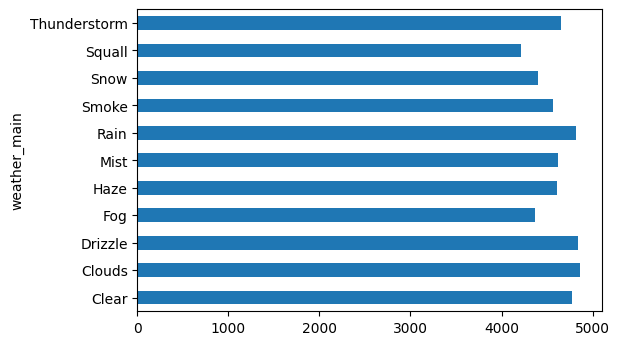

In [64]:
by_weather_main = daytime_traffic.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

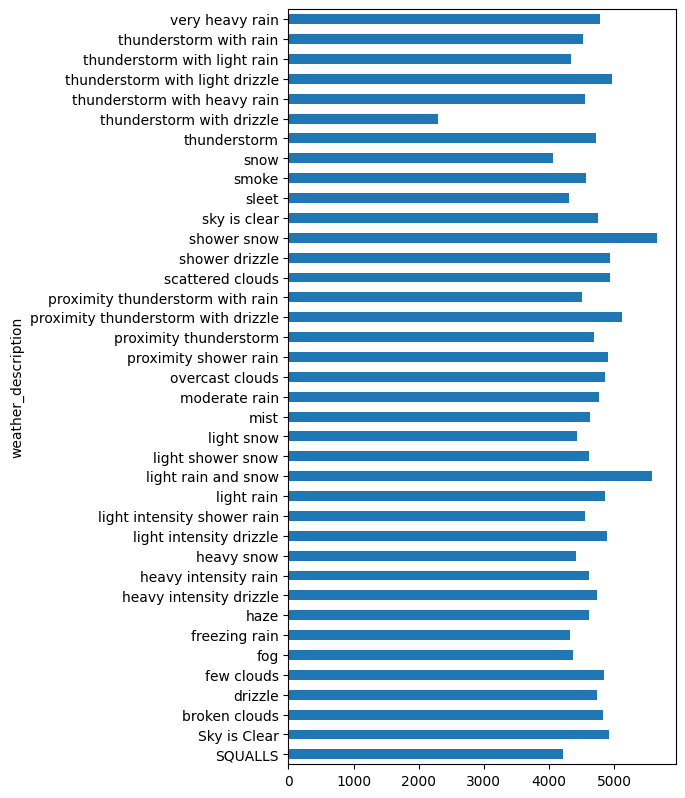

In [65]:
by_weather_description = daytime_traffic.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

There are three types of weather where traffic volume exceeds 5000:
   * Shower snow
   * Proximity thunderstorm with drizzle
   * Light rain and snow

## Conclusion

In this project, we tried to find indicators of heavy traffic on the I-94 interstate highway. We managed to ifnd two types of indicators:

* Time indicators
    * Traffic is usually heavier during warm months (Mar-Oct) as opposed to colder months (Nov-Feb)
    * Traffic is generally heavier on weekdays than the weekends
    * Most busy traffic hours during weekdays are about 7AM and 4PM 
* Weather indicators
    * Shower snow
    * Proximity thunderstorm with drizzle
    * Light rain and snow